# 0. required packages

In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

32276


# 1. load existing datasets

# load the annotation

In [2]:
import pandas as pd
pool_folder = r'\\10.245.74.212\Chromatin_NAS_2\Libraries\CTP-08_IgH'

igh_annotation = pd.read_csv(os.path.join(pool_folder, 'IgH_annotation_mm9.bed'), sep='\t', comment='t', header=None)

header = ['chrom', 'chromStart', 'chromEnd', 'name', 'score', 'strand', 'thickStart', 'thickEnd', 'itemRgb', 'blockCount', 'blockSizes', 'blockStarts']
igh_annotation.columns = header[:len(igh_annotation.columns)]

In [3]:
region_infos = get_img_info.Load_Region_Positions(r'\\10.245.74.158\Chromatin_NAS_1\20210326-proB_STI_DMSO_CTP-08_2color\Analysis',
                                                )
reg_ids = np.array([_i for _i in sorted(region_infos)], dtype=np.int)
reg_starts = np.array([region_infos[_i]['start'] for _i in reg_ids], dtype=np.int)
reg_ends = np.array([region_infos[_i]['end'] for _i in reg_ids], dtype=np.int)

- Importing csv file: \\10.245.74.158\Chromatin_NAS_1\20210326-proB_STI_DMSO_CTP-08_2color\Analysis\Region_Positions.csv
- header: ['region', 'chr', 'start', 'end', 'midpoint']
-- 144 genomic regions loaded!


In [4]:
feature_2_reg_id = {}

for _i, _name in enumerate(igh_annotation.name):
    print(_name)
    _start = igh_annotation.chromStart[_i]
    _end = igh_annotation.chromEnd[_i]
    
    _matched_reg_inds = np.where((reg_starts<=_start) & (reg_ends >= _end))[0]
    if len(_matched_reg_inds) == 1:
        feature_2_reg_id[_name] = reg_ids[_matched_reg_inds[0]]
        print(_start, _end)

3'CBE
HS8
HS7
HS6
HS5
HS4
HS3b
HS1
HS3a
Igha
Sa
Ighe
Se
Ighg2a
Sg2a
Ighg2b
Sg2b
Ighg1
Sg1
Ighg3
Sg3
Ighd
Ighm
Sm
Em
114665191 114666182
Ighj4
114666724 114666778
Ighj3
114667295 114667343
Ighj2
114667678 114667726
Ighj1
114667991 114668044
Ighd4-1/DQ52
114668738 114668749
Ighd3-2/DST4
114686424 114686440
Ighd5-6
114687798 114687808
Ighd2-8
114689061 114689078
Ighd5-5
114693152 114693162
Ighd2-7
114694930 114694947
Ighd5-8
114698074 114698103
Ighd5-4
114698311 114698321
Ighd2-6
114699579 114699596
Ighd5-7
114702734 114702763
Ighd5-3
114702971 114702981
Ighd2-5
114704237 114704254
Ighd5-2
114707636 114707646
Ighd2-4
114708904 114708921
Ighd6-2
114713085 114713114
Ighd2-3
114713610 114713627
Ighd6-1
114718353 114718382
Ighd1-1/DFL16.1
114720380 114720403
IGCR1
CBE2
114723470 114723489
CBE1
114726081 114726114
Adam6b
Ighd3-1
114763523 114763540
Ighd5-1
114765010 114765020
Adam6a
Ighv5-1P
114811139 114811433
Ighv5-2
114816714 114817201
Ighv2-2
114826477 114826911
Ighv5-4
114835658 114835952

In [5]:
feature_2_reg_id

{'Em': 43,
 'Ighj4': 43,
 'Ighj3': 43,
 'Ighj2': 43,
 'Ighj1': 43,
 'Ighd4-1/DQ52': 43,
 'Ighd3-2/DST4': 47,
 'Ighd5-6': 47,
 'Ighd2-8': 47,
 'Ighd5-5': 48,
 'Ighd2-7': 49,
 'Ighd5-8': 49,
 'Ighd5-4': 49,
 'Ighd2-6': 50,
 'Ighd5-7': 50,
 'Ighd5-3': 50,
 'Ighd2-5': 51,
 'Ighd5-2': 51,
 'Ighd2-4': 51,
 'Ighd6-2': 52,
 'Ighd2-3': 52,
 'Ighd6-1': 53,
 'Ighd1-1/DFL16.1': 54,
 'CBE2': 54,
 'CBE1': 55,
 'Ighd3-1': 62,
 'Ighd5-1': 63,
 'Ighv5-1P': 72,
 'Ighv5-2': 73,
 'Ighv2-2': 75,
 'Ighv5-4': 77,
 'Ighv2-3': 80,
 'Ighv5-6': 82,
 'Ighv2-4': 88,
 'Ighv5-9': 90,
 'Ighv2-5': 94,
 'Ighv5-12': 98,
 'Ighv2-6': 101,
 'Ighv5-9-1': 105,
 'Ighv5-12-4': 110,
 'Ighv2-9-1': 111,
 'Ighv1-31': 323,
 'Ighv1-32P': 324,
 'Ighv1-33P': 326,
 'Ighv1-34': 328,
 'Ighv1-36': 333,
 'Ighv1-38P': 339,
 'Ighv1-39': 340,
 'Ighv1-40P': 342,
 'Ighv1-42': 345,
 'Ighv1-43': 347,
 'Ighv1-46P': 353,
 'Ighv1-47': 356,
 'Ighv8-4': 362,
 'Ighv1-49': 368,
 'Ighv8-5': 371,
 'Ighv1-50': 381,
 'Ighv1-51P': 384,
 'Ighv1-52': 386,
 'Ig

In [6]:
pickle.dump(feature_2_reg_id, open(os.path.join(pool_folder, 'matched_feature_dict.pkl'), 'wb'))

In [14]:
cell_positive = [r'\\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20200807-proB_iaa_dox+\Picked_spots_fov_3-12.pkl']
cell_negative = [r'\\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20200827_proB_DMSO\Picked_spots_fov_3-12.pkl',
                 r'\\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20200920_IgH_proB_DMSO_2color\Picked_spots_fov_3-12.pkl', 
                 r'\\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20201215-proB_DMSO\Picked_spots_fov_3-12.pkl',
                ]
bone_marrow_wt = [r'\\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20201012_bone_marrow_igh++\Picked_spots_fov_3-12.pkl']

In [15]:
cell_positive = r'\\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20210320_IgH_proB_iaa_dox+\Picked_spots_fov_30-49.pkl'
cell_negative = r'\\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20210326_IgH_proB_DMSO\Picked_spots_fov_3-22.pkl'
bone_marrow_wt = r'\\10.245.74.212\Chromatin_NAS_2\IgH_analyzed_results\20201012_bone_marrow_igh++\Picked_spots_fov_3-12.pkl'

In [16]:
cp_data = pickle.load(open(cell_positive, 'rb'))
cn_data = pickle.load(open(cell_negative, 'rb'))
bm_data = pickle.load(open(bone_marrow_wt, 'rb'))

In [15]:
cell_positive_data = pickle.load(open(cell_positive, 'rb'))
cell_positive_data = pickle.load(open(cell_positive, 'rb'))

In [22]:
cn_reg1_rgs

[229.3392949376536,
 214.04429381644394,
 302.21787840385053,
 365.1977510949646,
 435.1145725839301,
 233.52872593870242,
 516.4688509659568,
 227.504486361387,
 228.56837537214625,
 184.25853165514516,
 193.65849896290925,
 213.32169414544063,
 241.42595357029293,
 320.78494,
 216.1530247331637,
 201.55109102553905,
 302.5241991374999,
 284.75072186730387,
 210.94316922177924,
 259.20238375859986,
 324.3124723566165,
 279.2213874714157,
 234.63699962865084,
 225.58968681810924,
 240.95125542560805,
 196.14742915162665,
 279.7107148589691,
 231.55274648228678,
 231.82286691065502,
 302.3710821058157,
 317.4354481461758,
 261.8345450727082,
 175.8399397458344,
 242.89256120466928,
 175.9575,
 186.88937,
 215.64801238574475,
 197.93409179094374,
 217.2824238928704,
 230.45488854173044,
 201.2969174258901,
 210.49850641019034,
 230.6683652939282,
 277.9529686619012,
 245.36460262790453,
 328.5472342170728,
 278.07115830533746,
 194.4107210226811,
 175.39084552553294,
 224.03068066868664,

In [29]:
cp_reg1_rgs = [spot_tools.scoring.radius_of_gyration(_hzxys[:74,1:]) for _hzxys in cp_data['hzxys']]
cn_reg1_rgs = [spot_tools.scoring.radius_of_gyration(_hzxys[:74,1:]) for _hzxys in cn_data['hzxys']]
bm_reg1_rgs = [spot_tools.scoring.radius_of_gyration(_hzxys[:74,1:]) for _hzxys in bm_data['hzxys']]

<IPython.core.display.Javascript object>


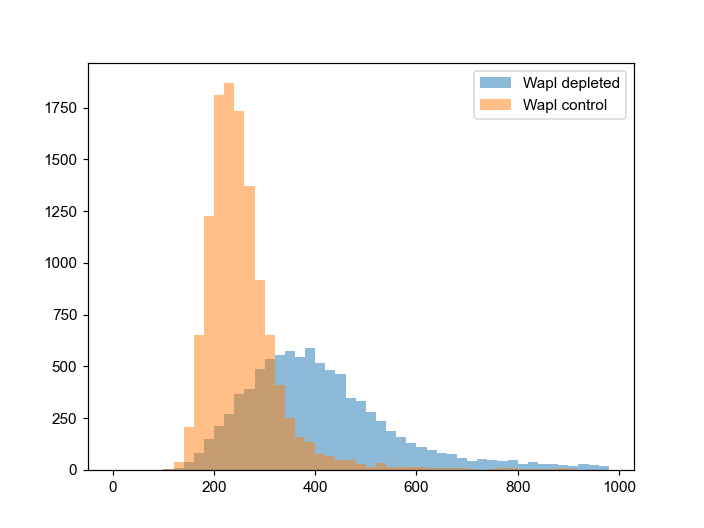

392.2418845793163
241.84000760837338


In [30]:
plt.figure()

plt.hist(cp_reg1_rgs, bins=np.arange(0,1000,20), alpha=0.5, label=f'Wapl depleted')
print(np.nanmedian(cp_reg1_rgs))
plt.hist(cn_reg1_rgs, bins=np.arange(0,1000,20), alpha=0.5, label=f'Wapl control')
print(np.nanmedian(cn_reg1_rgs))
#plt.hist(bm_reg1_rgs, bins=np.arange(0,1000,20), alpha=0.5, label=f'Bone marrow')
#print(np.nanmedian(bm_reg1_rgs))
plt.legend()
plt.show()

In [31]:
cp_reg2_rgs = [spot_tools.scoring.radius_of_gyration(_hzxys[74:,1:]) for _hzxys in cp_data['hzxys']]
cn_reg2_rgs = [spot_tools.scoring.radius_of_gyration(_hzxys[74:,1:]) for _hzxys in cn_data['hzxys']]
bm_reg2_rgs = [spot_tools.scoring.radius_of_gyration(_hzxys[74:,1:]) for _hzxys in bm_data['hzxys']]

<IPython.core.display.Javascript object>


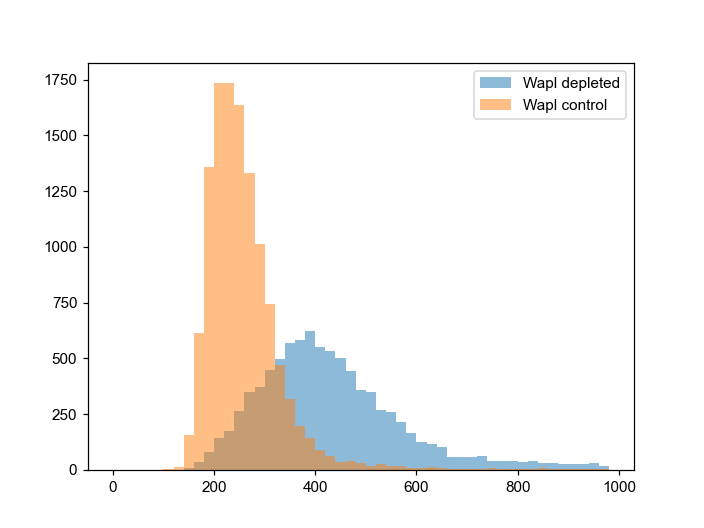

415.67595893070876
243.9418726140725


In [32]:
plt.figure()

plt.hist(cp_reg2_rgs, bins=np.arange(0,1000,20), alpha=0.5, label=f'Wapl depleted')
print(np.nanmedian(cp_reg2_rgs))
plt.hist(cn_reg2_rgs, bins=np.arange(0,1000,20), alpha=0.5, label=f'Wapl control')
print(np.nanmedian(cn_reg2_rgs))
#plt.hist(bm_reg2_rgs, bins=np.arange(0,1000,20), alpha=0.5, label=f'Bone marrow')
#print(np.nanmedian(bm_reg2_rgs))
plt.legend()
plt.show()

In [33]:
cp_total_rgs = [spot_tools.scoring.radius_of_gyration(_hzxys[:,1:]) for _hzxys in cp_data['hzxys']]
cn_total_rgs = [spot_tools.scoring.radius_of_gyration(_hzxys[:,1:]) for _hzxys in cn_data['hzxys']]
bm_total_rgs = [spot_tools.scoring.radius_of_gyration(_hzxys[:,1:]) for _hzxys in bm_data['hzxys']]

<IPython.core.display.Javascript object>


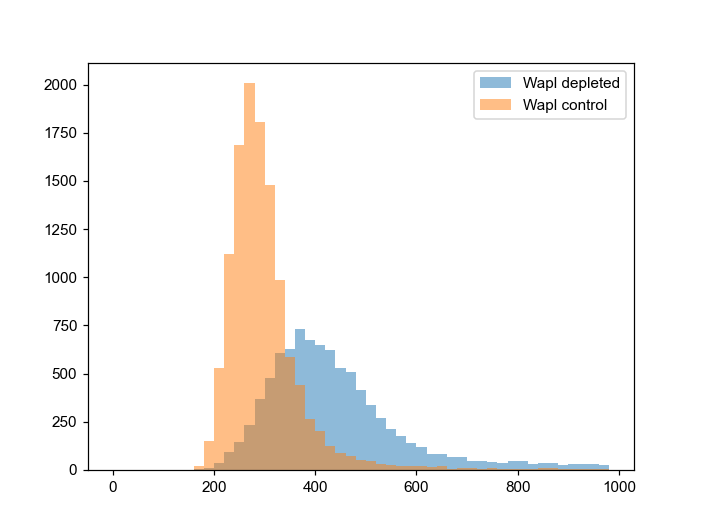

417.59245401749064
284.89906179299226


In [34]:
plt.figure()

plt.hist(cp_total_rgs, bins=np.arange(0,1000,20), alpha=0.5, label=f'Wapl depleted')
print(np.nanmedian(cp_total_rgs))
plt.hist(cn_total_rgs, bins=np.arange(0,1000,20), alpha=0.5, label=f'Wapl control')
print(np.nanmedian(cn_total_rgs))
#plt.hist(bm_total_rgs, bins=np.arange(0,1000,20), alpha=0.5, label=f'Bone marrow')
#print(np.nanmedian(bm_total_rgs))
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


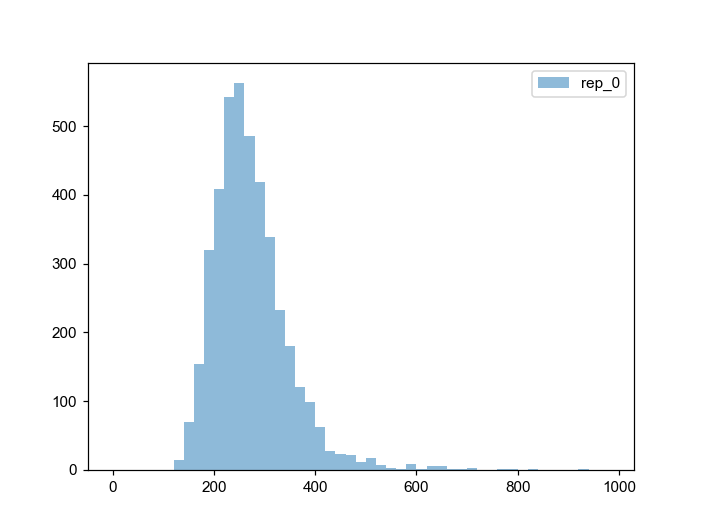

260.3842558743332


In [25]:
plt.figure()
for _i, _data in enumerate(cell_positive_data):
    rgs = [spot_tools.scoring.radius_of_gyration(_hzxys[:72,1:]) for _hzxys in _data['hzxys']]
    plt.hist(rgs, bins=np.arange(0,1000,20), alpha=0.5, label=f'rep_{_i}')
    print(np.median(rgs))
plt.legend()
plt.show()
    

<IPython.core.display.Javascript object>


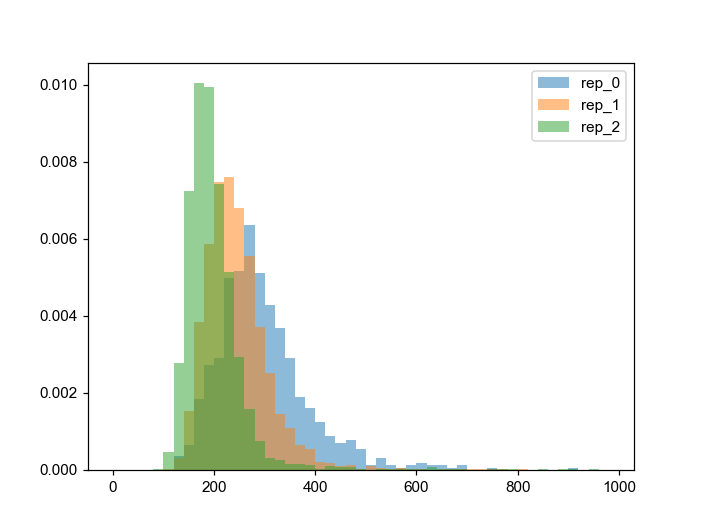

280.46866397030254
235.62455007778644
188.52193932306085


In [26]:
plt.figure()
for _i, _data in enumerate(cell_negative_data):
    rgs = [spot_tools.scoring.radius_of_gyration(_hzxys[:72,1:]) for _hzxys in _data['hzxys']]
    plt.hist(rgs, bins=np.arange(0,1000,20), alpha=0.5, label=f'rep_{_i}', density=True)
    print(np.median(rgs))
plt.legend()
plt.show()
    

In [8]:
len(cell_negative_data[0]['hzxys'])

843